In [2]:
#import pennylane as qml
import numpy as np
from qiskit import QuantumCircuit, transpile, QuantumRegister,ClassicalRegister, Aer, transpile,IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from ibm_quantum_widgets import *
import pylatexenc
# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
#from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

import pyzx as zx
import matplotlib.pyplot as plt

## 2 addressing qubit RX optimized circuit

In [3]:
inp = QuantumRegister(2,'input')
r = QuantumRegister(4,'routing')
mem = QuantumRegister(4,'memory')
rdwr = QuantumRegister(1,'read/write')
ro = QuantumRegister(1,'readout')
cr = ClassicalRegister(1)



In [4]:
opr = QuantumCircuit.from_qasm_file('opread.qasm')
ogr = opr.to_gate()

opw = QuantumCircuit.from_qasm_file('opwrite.qasm')
ogw = opr.to_gate()



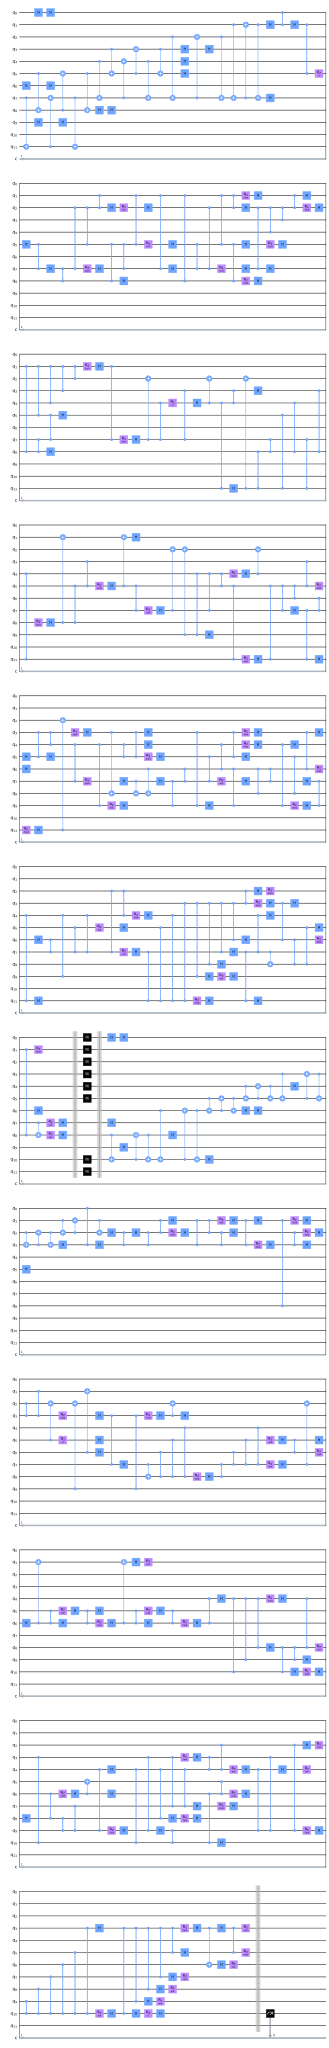

In [5]:
opr = QuantumCircuit.from_qasm_file('opread.qasm')
ogr = opr.to_gate()

opw = QuantumCircuit.from_qasm_file('opwrite.qasm')
ogw = opw.to_gate()

res = QuantumCircuit(12,1)
res.barrier
res.reset(0)
res.reset(1)
res.reset(2)
res.reset(3)
res.reset(4)
res.reset(5)
res.reset(10)
res.reset(11)
res.barrier()

op = QuantumCircuit(12,1)
op = op.compose(opw)
op.barrier()
op = op.compose(res)
op = op.compose(opr)
op.barrier()
op.measure(10,0)
op.draw('mpl',filename="Verify1.png")


In [ ]:
sample = QuantumCircuit(12,1)
sample.append(ogw,[0,1,2,3,4,5,6,7,8,9,10,11])
sample = sample.compose(res)
sample = sample.append(ogr,[0,1,2,3,4,5,6,7,8,9,10,11])

In [ ]:
sample.draw('mpl')

In [ ]:
# Output 
sim = Aer.get_backend('aer_simulator') 
result = sim.run(op).result()
counts = result.get_counts()
plot_histogram(counts)

## CSWAP modified QRAM Architecture

In [6]:
oprf = QuantumCircuit.from_qasm_file('opreadf.qasm')
ogrf = oprf.to_gate()

opwf = QuantumCircuit.from_qasm_file('opwritef.qasm')
ogwf = opwf.to_gate()

resf = QuantumCircuit(12,1)
resf.reset(0)
resf.reset(1)
resf.reset(2)
resf.reset(3)
resf.reset(4)
resf.reset(5)
resf.reset(10)
resf.reset(11)
resf.barrier()


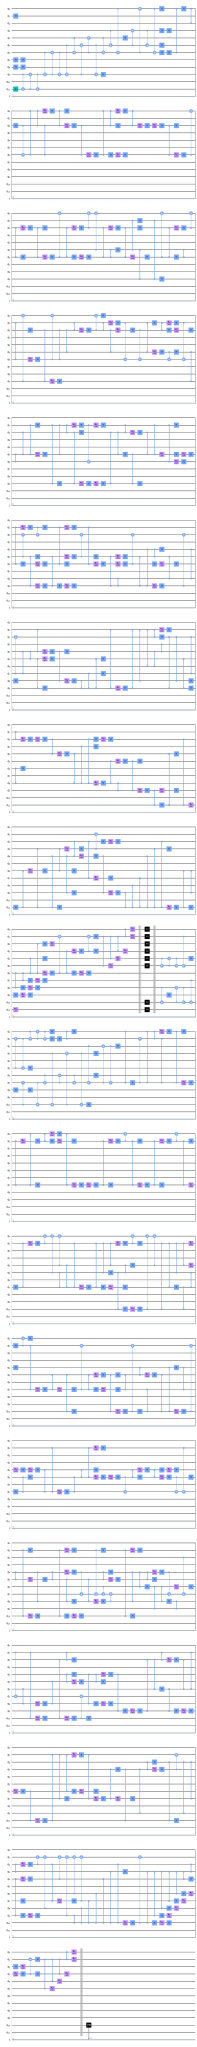

In [7]:
opf = QuantumCircuit(12,1)
opf.x(11)
opf = opf.compose(opwf)
opf.barrier()
opf = opf.compose(resf)
opf = opf.compose(oprf)
opf.barrier()
opf.measure(10,0)
opf.draw('mpl',filename="Verify2.png")


In [ ]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(opf).result()
counts = result.get_counts()
plot_histogram(counts)

## Dynamic Circuit Optimization

In [8]:
oprd = QuantumCircuit.from_qasm_file('opreadd.qasm')

opwd = QuantumCircuit.from_qasm_file('opwrited.qasm')


resd = QuantumCircuit(12,1)
resd.reset(0)
resd.reset(1)
resd.reset(2)
resd.reset(3)
resd.reset(4)
resd.reset(5)
resd.reset(10)
resd.reset(11)
resd.barrier()


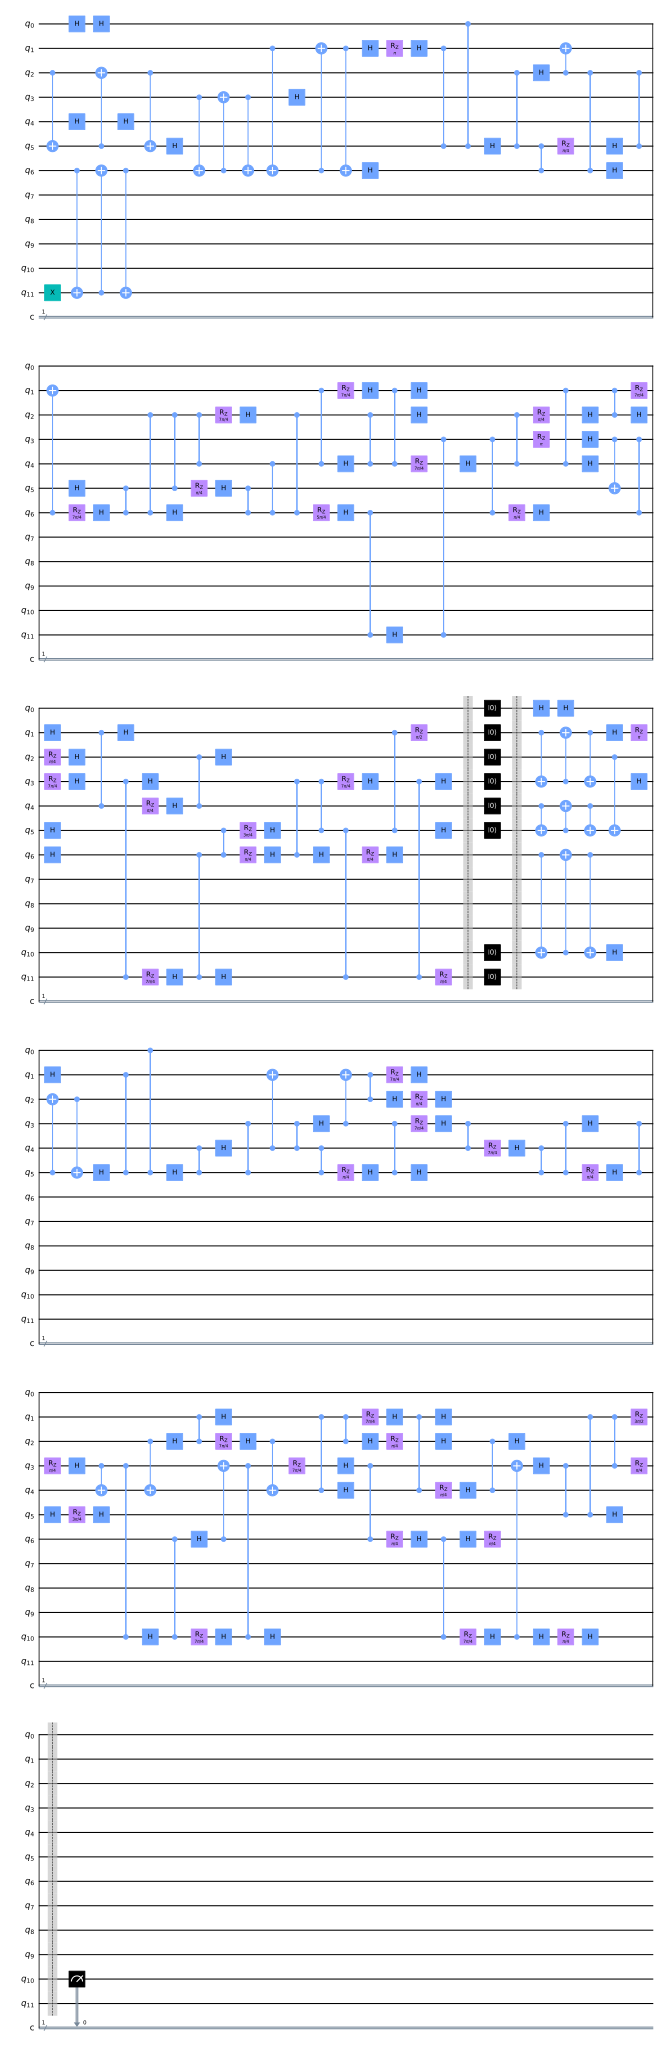

In [9]:
opd = QuantumCircuit(12,1)
opd.x(11)
opd = opd.compose(opwd)
opd.barrier()
opd = opd.compose(resd)
opd = opd.compose(oprd)
opd.barrier()
opd.measure(10,0)
opd.draw('mpl', filename = "verify3.png")

In [ ]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(opf).result()
counts = result.get_counts()
plot_histogram(counts)